In [2]:
# change to py file

In [3]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# load images
img1= cv2.imread('C:/Users/casca/OneDrive/Documenten/image_processing/assignment_3/THE3_Images/1.png')
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2= cv2.imread('C:/Users/casca/OneDrive/Documenten/image_processing/assignment_3/THE3_Images/2.png')
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3= cv2.imread('C:/Users/casca/OneDrive/Documenten/image_processing/assignment_3/THE3_Images/3.png')
img3= cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4= cv2.imread('C:/Users/casca/OneDrive/Documenten/image_processing/assignment_3/THE3_Images/4.png')
img4= cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5= cv2.imread('C:/Users/casca/OneDrive/Documenten/image_processing/assignment_3/THE3_Images/5.png')
img5= cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6= cv2.imread('C:/Users/casca/OneDrive/Documenten/image_processing/assignment_3/THE3_Images/6.png')
img6= cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)


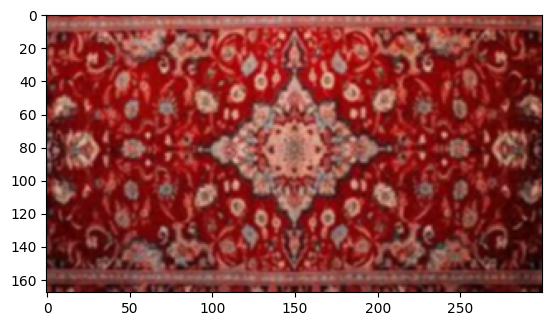

In [5]:
img2_smooth= cv2.GaussianBlur(img2, (3,3), 0)
plt.imshow(img2_smooth)

(225, 225, 3)
(199, 199, 3)


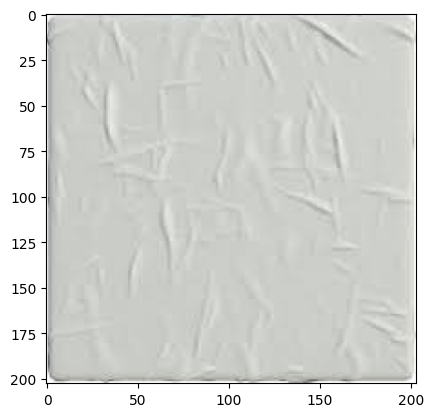

In [27]:
print(img3.shape)
plt.imshow(img3[11:214, 11:214])
img3_crop = img3[13:212, 13:212]
print(img3_crop.shape)


In [ ]:
# grayscale histrograms proved more useful
for image in [img1, img2, img3_crop, img4, img5, img6]:
    channels = cv2.split(image)
    colors = ('b', 'g', 'r')  
    plt.figure()
    plt.title("Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    for channel, color in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()


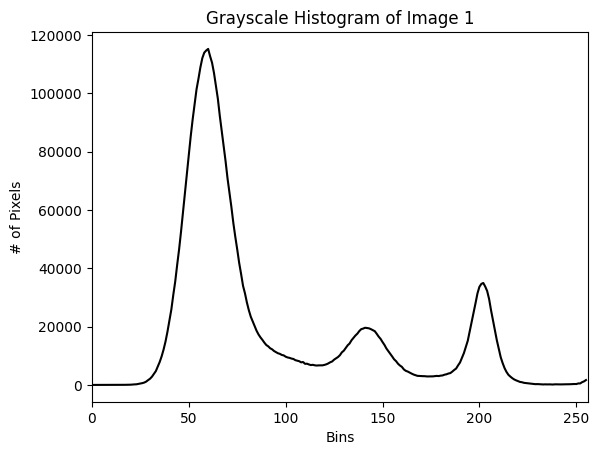

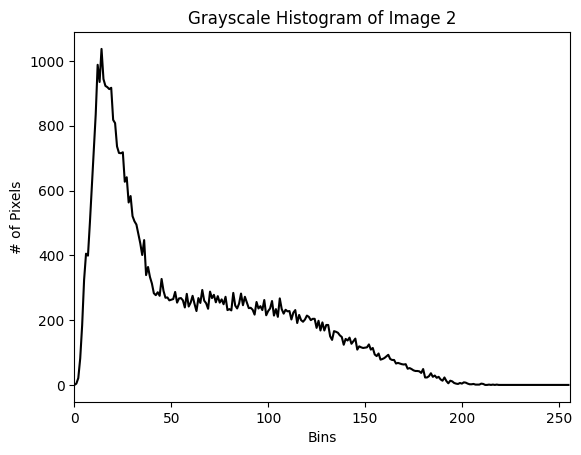

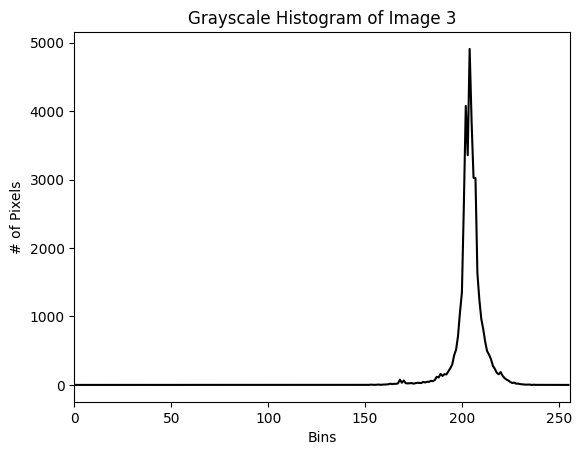

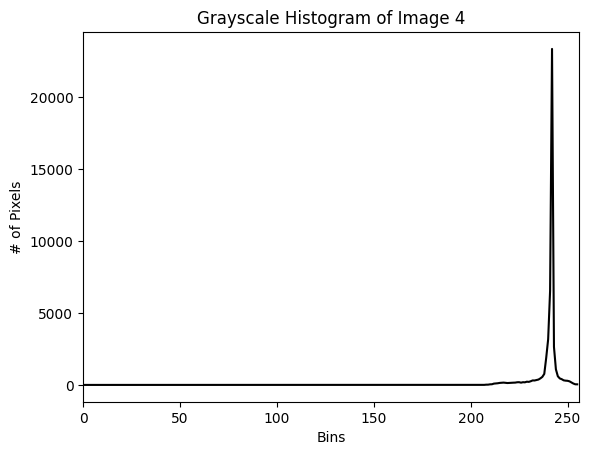

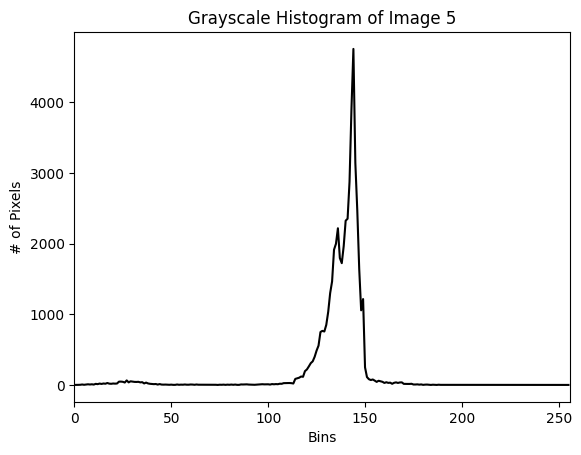

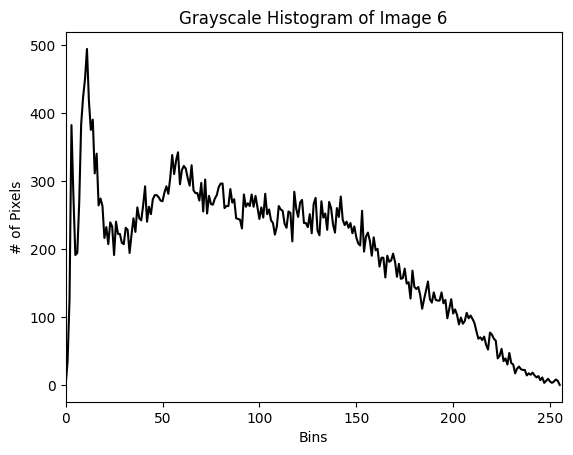

In [180]:
for i, image in enumerate([img1, img2, img3_crop, img4, img5, img6]):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    plt.figure()
    plt.title(f"Grayscale Histogram of Image {i+1}")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(gray_hist, color='black')
    plt.xlim([0, 256])
    plt.show()
# peaks if red, blue, yellow/white?
# red vs rest?
# peak of image 3 at the right, without removing the padding, the padding?? if eliminated k-means 3 might be usefull
# left side peak might indicate shade/ wrinkle
# for image 5/6 extraction zip very hard with k-means because same color as background


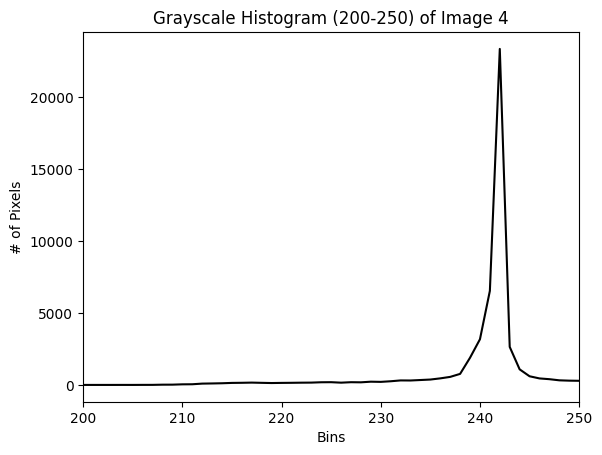

In [9]:
# Plot the grayscale histogram for the range 200 to 250 of image 4
# slope at around 240 looks like the shade/ wrinkle 
gray_image = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)
gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.figure()
plt.title(f"Grayscale Histogram (200-250) of Image {4}")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(range(200, 251), gray_hist[200:251], color='black')  # Only plot bins 200 to 250
plt.xlim([200, 250])  # Set the x-axis limits
plt.show()


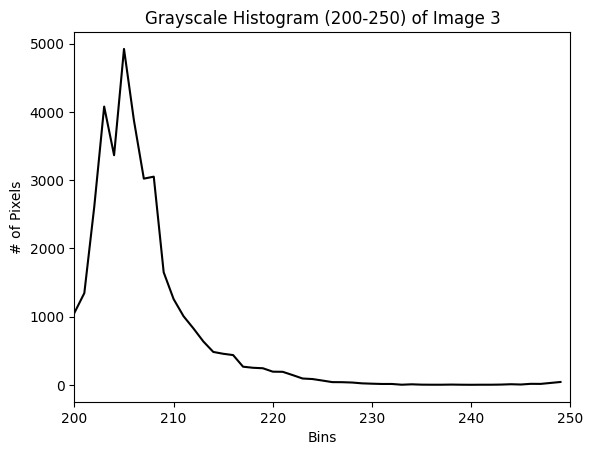

In [24]:
# Plot the grayscale histogram for the range 150 to 240 of image 3
# if padding remove 3 peaks so k-means 3   
gray_image = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.figure()
plt.title(f"Grayscale Histogram (200-250) of Image {3}")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(range(150, 250), gray_hist[150:250], color='black')  
plt.xlim([200, 250])  
plt.show()

In [ ]:
# Function to apply grayscale morphology
# seems to give decent results hyperparameter tuning needed for improvement
def grayscale_morphology(image, operation, kernel_size=(5, 5), iterations=1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    if operation == 'erode':
        result = cv2.erode(image, kernel, iterations=iterations)
    elif operation == 'dilate':
        result = cv2.dilate(image, kernel, iterations=iterations)
    elif operation == 'open':
        result = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=iterations)
    elif operation == 'close':
        result = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=iterations)
    elif operation == 'gradient':
        result = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    elif operation == 'tophat':
        result = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    elif operation == 'blackhat':
        result = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    else:
        raise ValueError(f"Unsupported operation: {operation}")
    return result

# Function to display results
def display_results(original, processed, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap='gray')
    plt.title(title)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Load and process the grayscale images

images = [img1, img2_smooth, img3_crop, img4, img5, img6]

for i, image in enumerate(images):
    # Load the grayscale image
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    if i in [0, 1]:  # Figures (a) and (b): Extract primary pattern on the rug
        close_image = grayscale_morphology(gray_image, 'close', kernel_size=(3, 3), iterations=2)
        open_image = grayscale_morphology(gray_image, 'open', kernel_size=(3, 3), iterations=2)
        gradient_image = grayscale_morphology(gray_image, 'gradient', kernel_size=(3, 3))
        tophat_image = grayscale_morphology(gray_image, 'tophat', kernel_size=(3, 3))
        blackhat_image = grayscale_morphology(gray_image, 'blackhat', kernel_size=(3, 3))
        display_results(gray_image, close_image, "Primary Pattern (Closed)")
        display_results(gray_image, open_image, "Primary Pattern (Opened)")
        display_results(gray_image, gradient_image, "Primary Pattern (Gradient)")
        display_results(gray_image, tophat_image, "Primary Pattern (Top-Hat)")
        display_results(gray_image, blackhat_image, "Primary Pattern (Black-Hat)")


    elif i in [2, 3]:  # Figures (c) and (d): Extract fabric areas with visible wrinkles
        close_image = grayscale_morphology(gray_image, 'close', kernel_size=(3, 3), iterations=2)
        open_image = grayscale_morphology(gray_image, 'open', kernel_size=(3, 3), iterations=2)
        gradient_image = grayscale_morphology(gray_image, 'gradient', kernel_size=(3, 3))
        tophat_image = grayscale_morphology(gray_image, 'tophat', kernel_size=(3, 3))
        blackhat_image = grayscale_morphology(gray_image, 'blackhat', kernel_size=(3, 3))
        display_results(gray_image, close_image, "Visible Wrinkles (Closed)")
        display_results(gray_image, open_image, "Visible Wrinkles (Opened)")
        display_results(gray_image, gradient_image, "Visible Wrinkles (Gradient)")
        display_results(gray_image, tophat_image, "Visible Wrinkles (Top-Hat)")
        display_results(gray_image, blackhat_image, "Visible Wrinkles(Black-Hat)")

    elif i in [4, 5]:  # Figures (e) and (f): Extract the zip
        close_image = grayscale_morphology(gray_image, 'close', kernel_size=(3, 3), iterations=2)
        open_image = grayscale_morphology(gray_image, 'open', kernel_size=(3, 3), iterations=2)
        gradient_image = grayscale_morphology(gray_image, 'gradient', kernel_size=(3, 3))
        tophat_image = grayscale_morphology(gray_image, 'tophat', kernel_size=(3, 3))
        blackhat_image = grayscale_morphology(gray_image, 'blackhat', kernel_size=(3, 3))
        display_results(gray_image, close_image, "Zipper (Closed)")
        display_results(gray_image, open_image, "Zipper (Opened)")
        display_results(gray_image, gradient_image, "Zipper (Gradient)")
        display_results(gray_image, tophat_image, "Zipper (Top-Hat)")
        display_results(gray_image, blackhat_image, "Zipper (Black-Hat)")




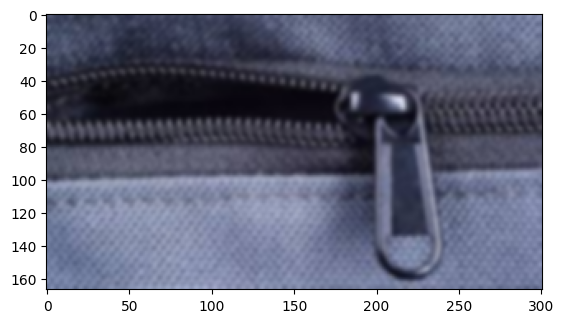

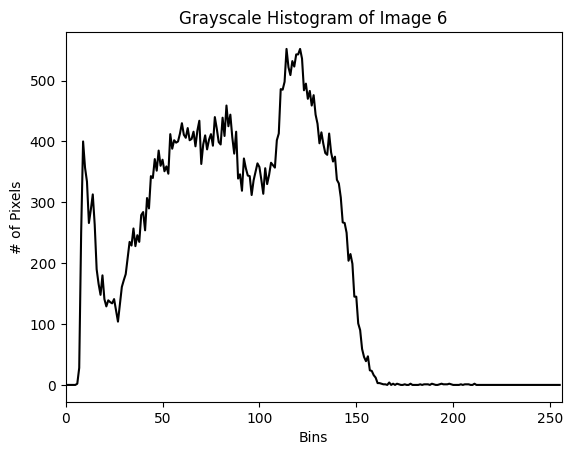

In [40]:
img6_blur=  cv2.GaussianBlur(img6, (7,7), 0)
plt.imshow(img6_blur)
gray_hist = cv2.calcHist([img6_blur], [0], None, [256], [0, 256])
plt.figure()
plt.title(f"Grayscale Histogram of Image {6}")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(gray_hist, color='black')
plt.xlim([0, 256])
plt.show()

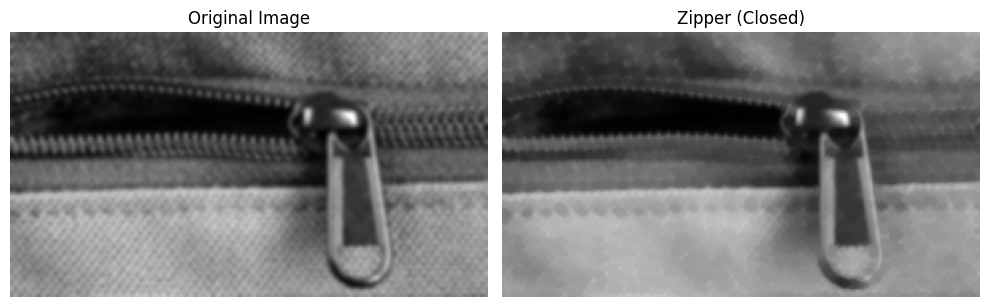

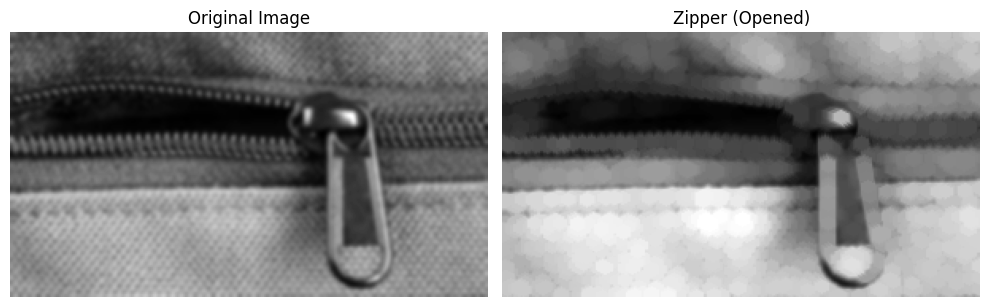

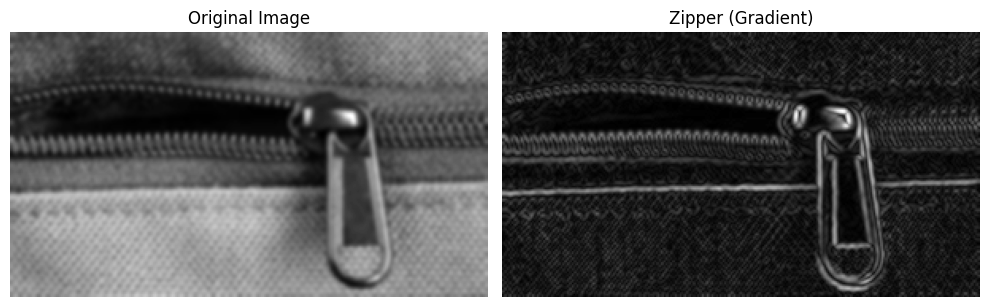

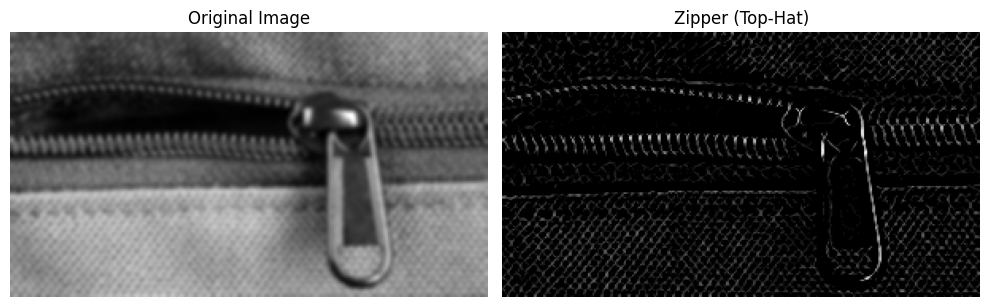

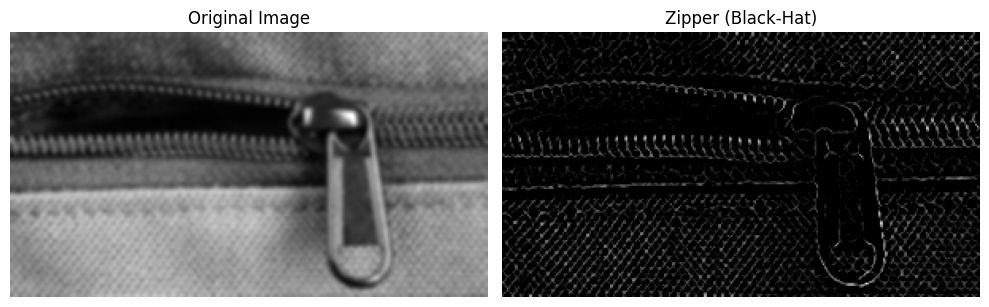

In [41]:
# hyperparameter tuning for image 6
def grayscale_morphology(image, operation, kernel_size=(5, 5), iterations=1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    if operation == 'erode':
        result = cv2.erode(image, kernel, iterations=iterations)
    elif operation == 'dilate':
        result = cv2.dilate(image, kernel, iterations=iterations)
    elif operation == 'open':
        result = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=iterations)
    elif operation == 'close':
        result = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=iterations)
    elif operation == 'gradient':
        result = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    elif operation == 'tophat':
        result = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    elif operation == 'blackhat':
        result = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    else:
        raise ValueError(f"Unsupported operation: {operation}")
    return result

gray_image = cv2.cvtColor(img6_blur, cv2.COLOR_RGB2GRAY)
close_image = grayscale_morphology(gray_image, 'close', kernel_size=(5, 5), iterations= 1)
open_image = grayscale_morphology(gray_image, 'open', kernel_size=(5,5 ), iterations= 2)
gradient_image = grayscale_morphology(gray_image, 'gradient', kernel_size=(3, 3))
tophat_image = grayscale_morphology(gray_image, 'tophat', kernel_size=(3, 3))
blackhat_image = grayscale_morphology(gray_image, 'blackhat', kernel_size=(3, 3))
display_results(gray_image, close_image, "Zipper (Closed)")
display_results(gray_image, open_image, "Zipper (Opened)")       
display_results(gray_image, gradient_image, "Zipper (Gradient)")
display_results(gray_image, tophat_image, "Zipper (Top-Hat)")
display_results(gray_image, blackhat_image, "Zipper (Black-Hat)")



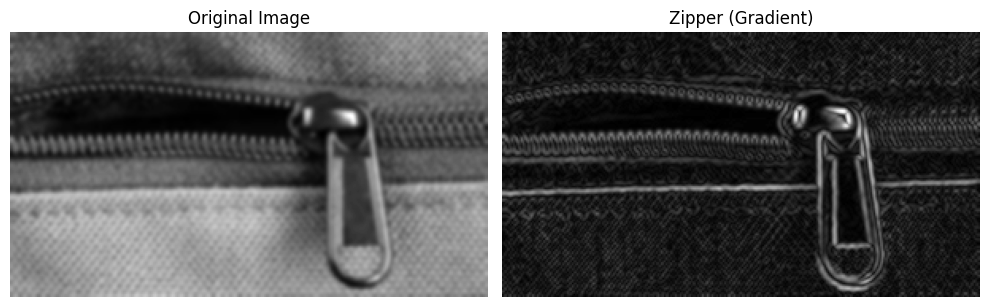

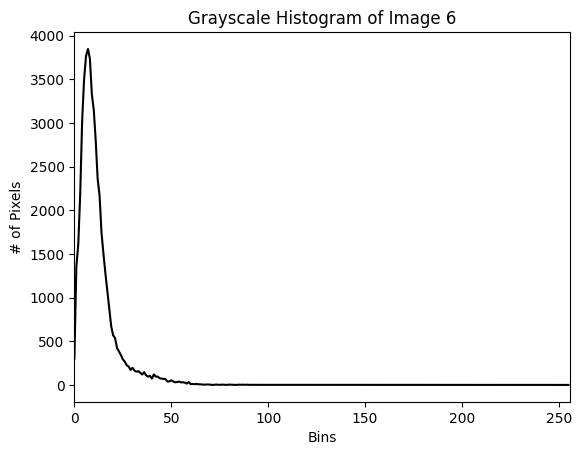

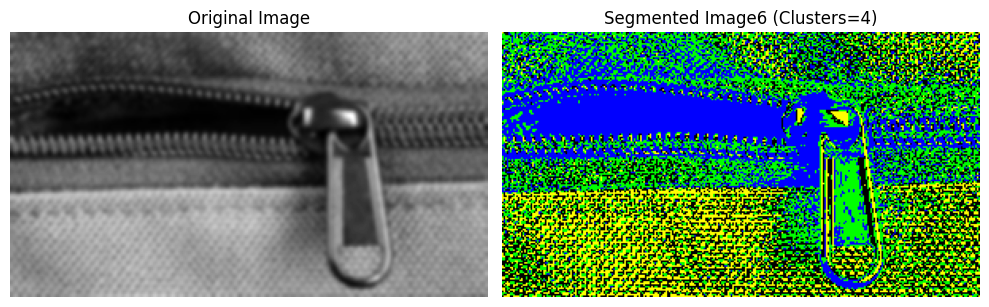

In [196]:
distinct_colors = np.array([
    [0, 0, 0], # black 
    [0, 255, 0],  # Green
    [0, 0, 255],  # Blue
    [255, 255, 0], # Yellow
    [255,100,0],
], dtype=np.uint8)
gray_image = cv2.cvtColor(img6_blur, cv2.COLOR_RGB2GRAY)
gradient_image = grayscale_morphology(gray_image, 'gradient', kernel_size=(3, 3))
display_results(gray_image, gradient_image, "Zipper (Gradient)")
gray_hist = cv2.calcHist([gradient_image], [0], None, [256], [0, 256])
plt.figure()
plt.title(f"Grayscale Histogram of Image {6}")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(gray_hist, color='black')
plt.xlim([0, 256])
plt.show()

pixels = image.reshape((-1, 3)) 
pixels = np.float32(pixels)  
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
kmeans.fit(pixels)
labels = kmeans.labels_  
centroids = np.uint8(kmeans.cluster_centers_) 
segmented_pixels = distinct_colors[labels] 
segmented_image = segmented_pixels.reshape(image.shape) 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"Segmented Image{i+1} (Clusters={num_clusters})")
plt.axis("off")
plt.tight_layout()
plt.show()

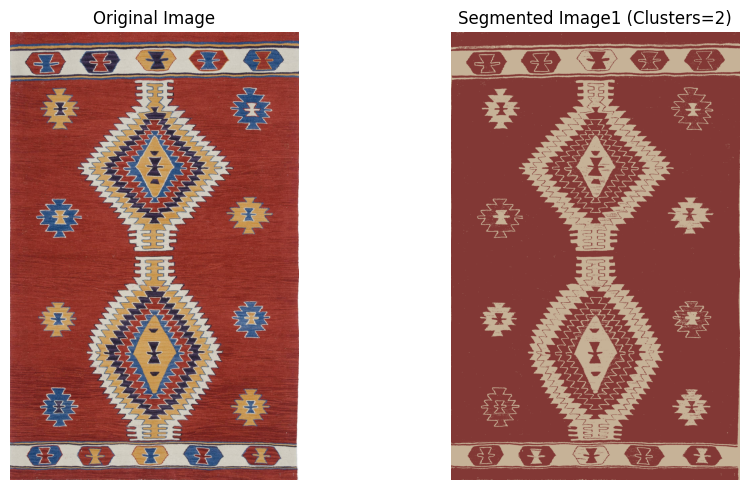

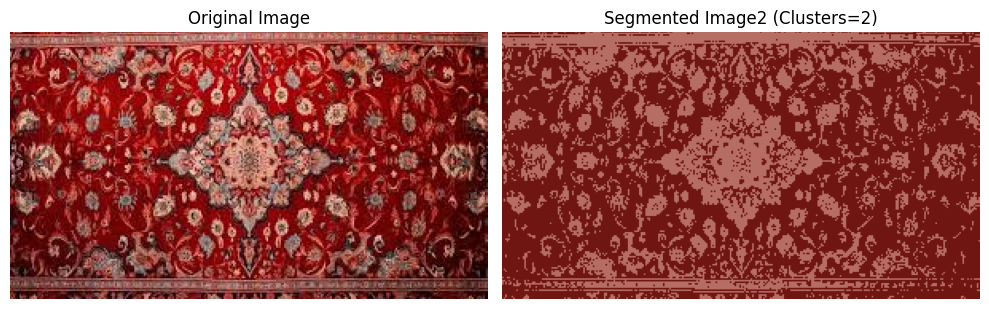

In [14]:
# K-means for rug patterns
# maybe add smoothing before hand to reduce noise in image 2
for i, image in enumerate([img1, img2]):
    pixels = image.reshape((-1, 3)) 
    pixels = np.float32(pixels)  
    num_clusters = 2

    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(pixels)

    labels = kmeans.labels_  
    centroids = np.uint8(kmeans.cluster_centers_) 

    segmented_pixels = centroids[labels]
    segmented_image = segmented_pixels.reshape(image.shape) 

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f"Segmented Image{i+1} (Clusters={num_clusters})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

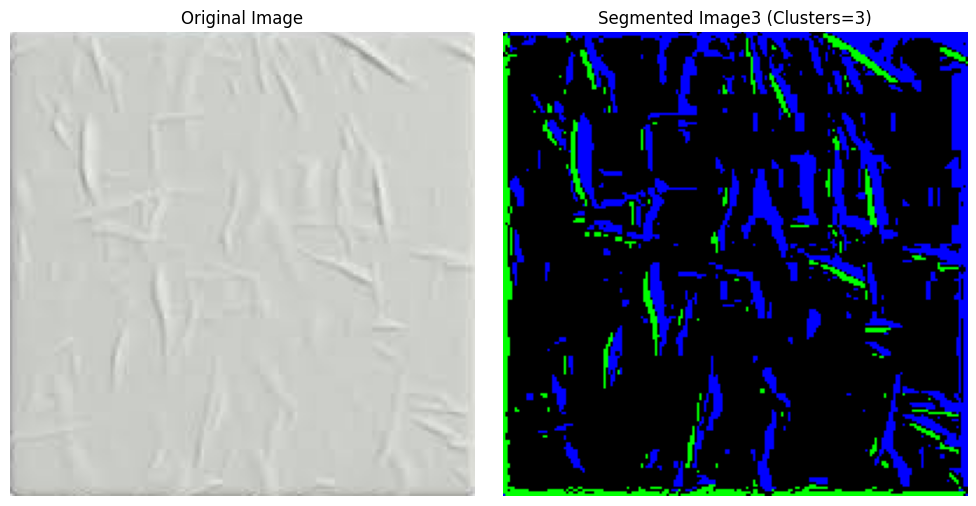

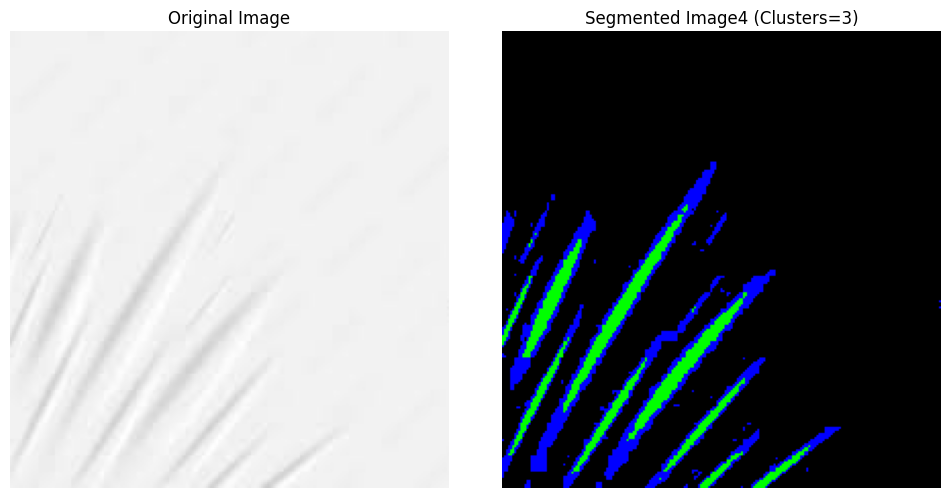

In [ ]:
# K-means for wrinkle detection, 2 didnt give all the wrinkles
distinct_colors = np.array([
    [0, 0, 0], # black 
    [0, 255, 0],  # Green
    [0, 0, 255],  # Blue
    [255, 255, 0] # Yellow
], dtype=np.uint8)

for i, image in enumerate([img3_crop, img4]):
    pixels = image.reshape((-1, 3))  # Flatten image to (num_pixels, 3)
    pixels = np.float32(pixels)  # Convert pixels to float32 for KMeans
    num_clusters = 3 # Number of clusters (corresponding to distinct colors)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(pixels)

    labels = kmeans.labels_  # Get the cluster labels
    # Use distinct_colors for segmentation instead of centroids
    segmented_pixels = distinct_colors[labels]  # Map labels to the distinct_colors
    segmented_image = segmented_pixels.reshape(image.shape)  # Reshape to original image shape

    # Plot the original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f"Segmented Image{i+3} (Clusters={num_clusters})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

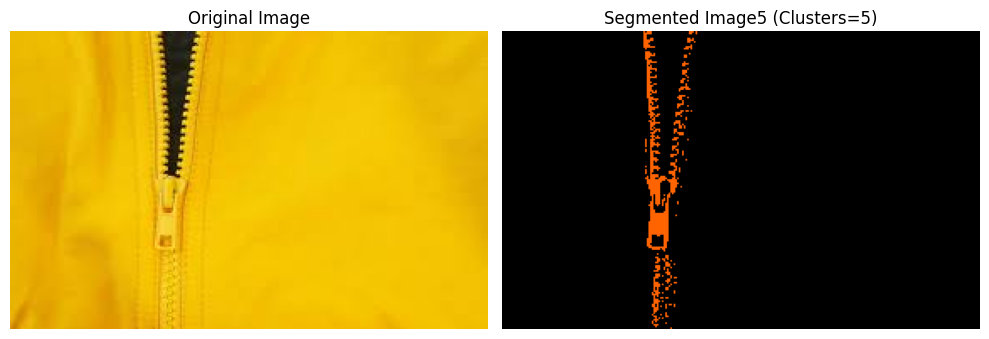

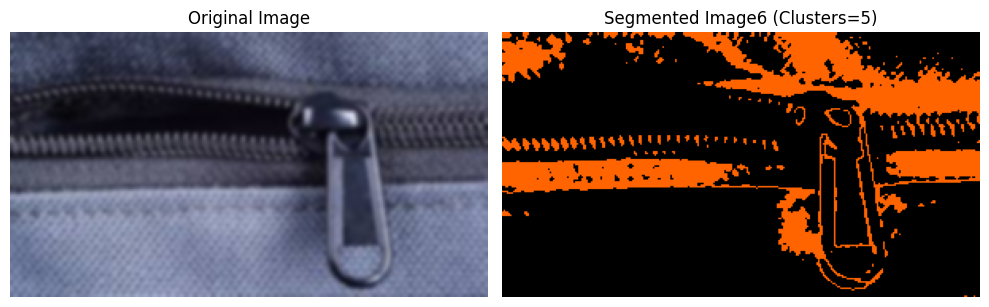

In [114]:
# K-means for zipper detection
# for k from 1 to 5 k-means was not able to segmented the zipper
distinct_colors = np.array([
    [0, 0, 0], # black 
    [0, 0, 0],  # Green
    [0, 0, 0],  # Blue
    [0, 0, 0], # Yellow
    [255,100,0],
], dtype=np.uint8)
for i, image in enumerate([img5, img6_blur]):
    pixels = image.reshape((-1, 3)) 
    pixels = np.float32(pixels)  
    num_clusters = 5

    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(pixels)

    labels = kmeans.labels_  

    segmented_pixels = distinct_colors[labels] 
    segmented_image = segmented_pixels.reshape(image.shape) 

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f"Segmented Image{i+5} (Clusters={num_clusters})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

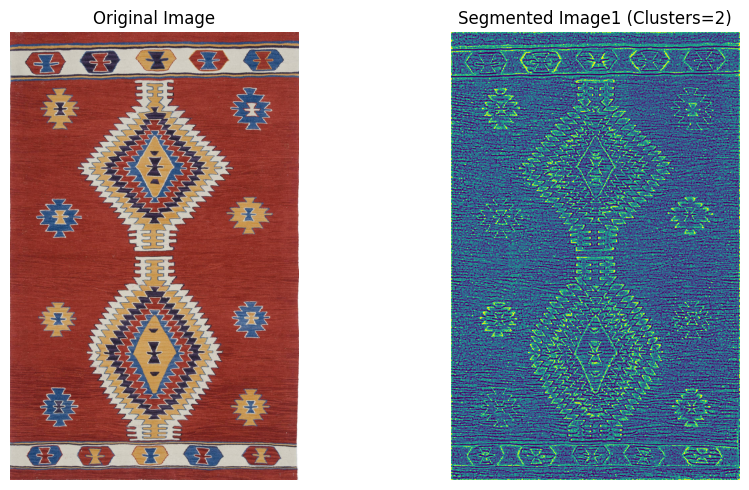

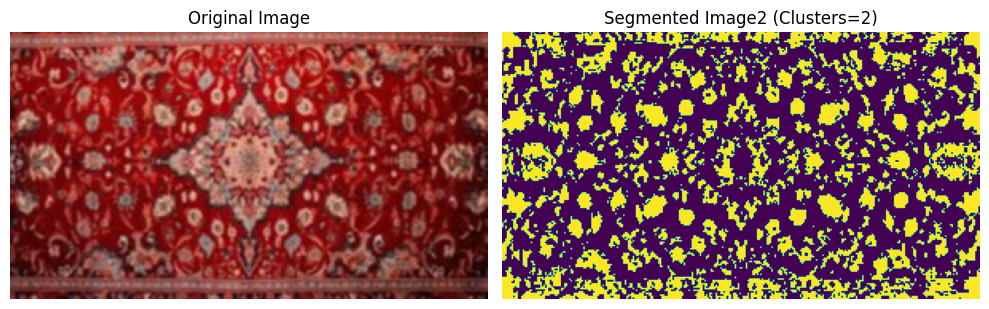

In [73]:
# K-means with LBP for rug pattern
# works but hyperparameter tuning needed!!!!!!!!!! increasing radius seems to improve results until 6
for i, image in enumerate([img1, img2_smooth]):
    clusters=2   # number of K
    radius= 10    # Radius for LBP
    points = 8   # Number of circularly symmetric neighbors in LBP
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray, points, radius, method='uniform')
    lbp_flat = lbp.reshape(-1, 1)
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(lbp_flat)
    segmented_image = kmeans.labels_.reshape(gray.shape)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f"Segmented Image{i+1} (Clusters={clusters})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

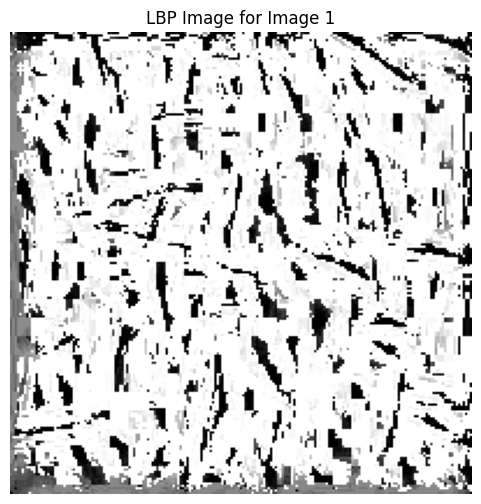

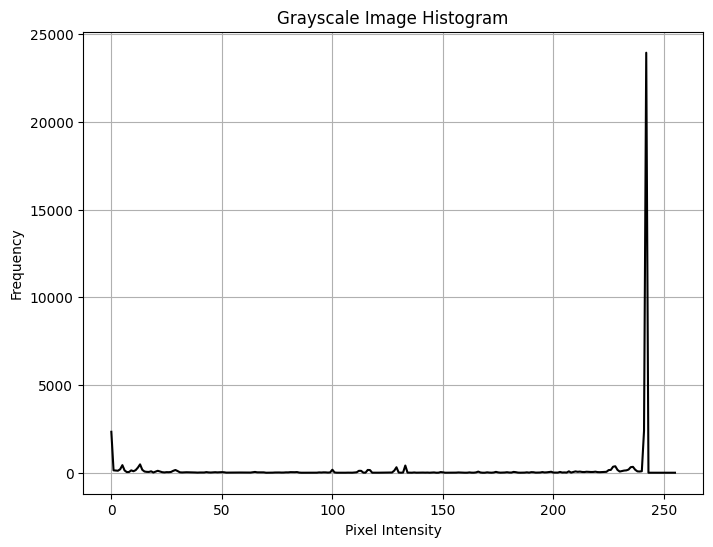

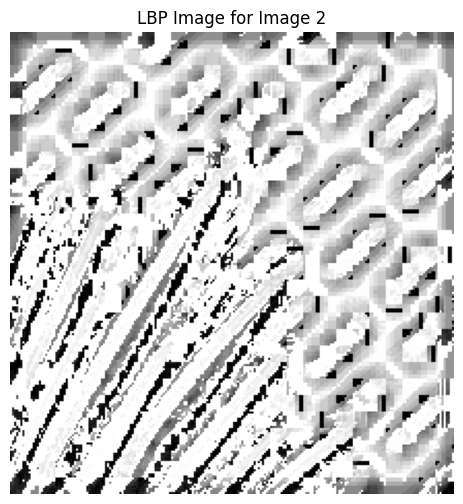

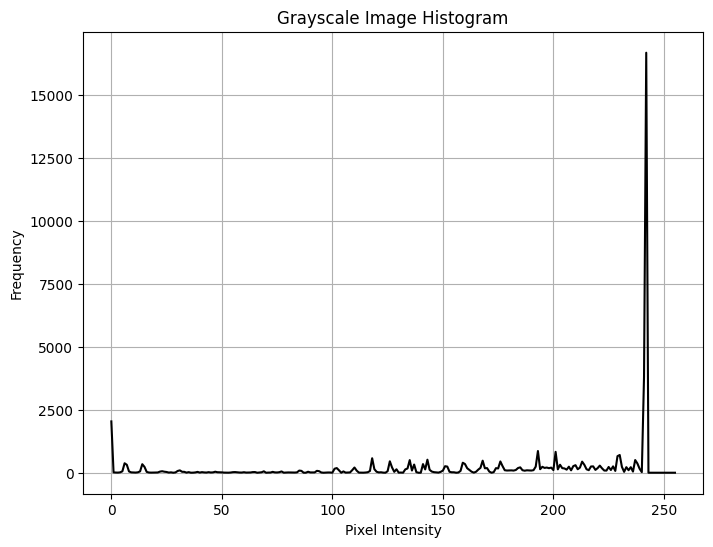

In [ ]:
for i, image in enumerate([img3_crop, img4]):
    radius =       # Radius for LBP
    points =      # Number of circularly symmetric neighbors in LBP
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Compute LBP with 'var' method
    lbp = local_binary_pattern(gray, points, radius, method='nri_uniform')
    # Handle NaN and infinite values in LBP
    lbp = np.nan_to_num(lbp, nan=0.0, posinf=0.0, neginf=0.0)
    # Display  LBP image
    plt.figure(figsize=(6, 6))
    plt.imshow(lbp, cmap='gray')
    plt.title(f"LBP Image for Image {i + 1}")
    plt.axis("off")
    plt.show()
    
    # Convert LBP to uint8
    lbp_uint8 = np.uint8(lbp)  
    # Compute histogram
    hist = cv2.calcHist([lbp_uint8], [0], None, [256], [0, 256])
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.plot(hist, color='black')
    plt.title("Grayscale Image Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

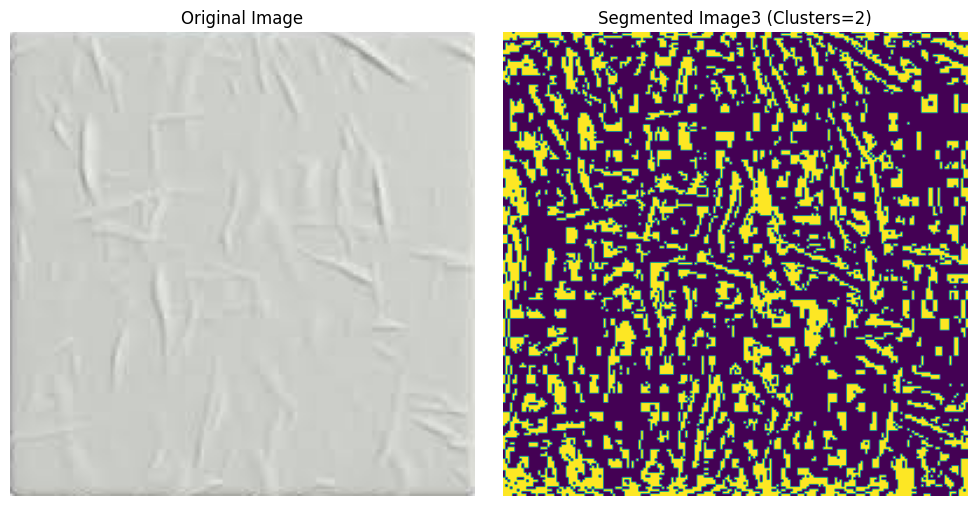

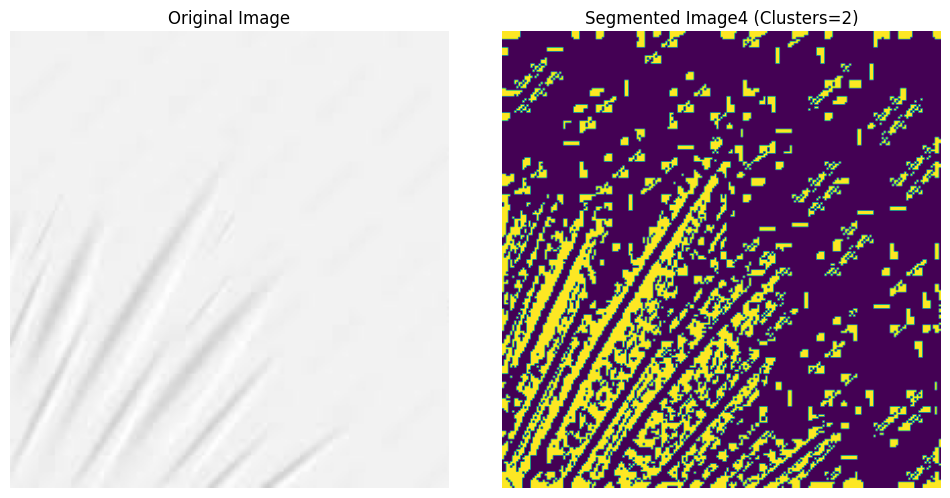

In [84]:
# K-means with LBP for wrinkle detection
# seems to not give sensable output at all :(
distinct_colors = np.array([
    [0, 0, 0], # black 
    [0, 0, 0],  # Green
    [0, 0, 0],  # Blue
    [0, 0, 0], # Yellow
    [255,100,0]
], dtype=np.uint8)
for i, image in enumerate([img3_crop, img4]):
    clusters= 2   # number of K
    radius=  4  # Radius for LBP
    points = 8   # Number of circularly symmetric neighbors in LBP
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray, points, radius, method='uniform')
    lbp_flat = lbp.reshape(-1, 1)
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(lbp_flat)
    segmented_image = kmeans.labels_.reshape(gray.shape)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f"Segmented Image{i+3} (Clusters={clusters})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

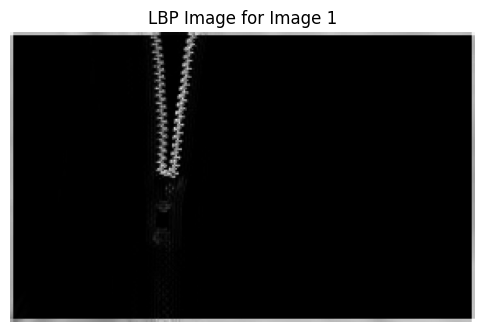

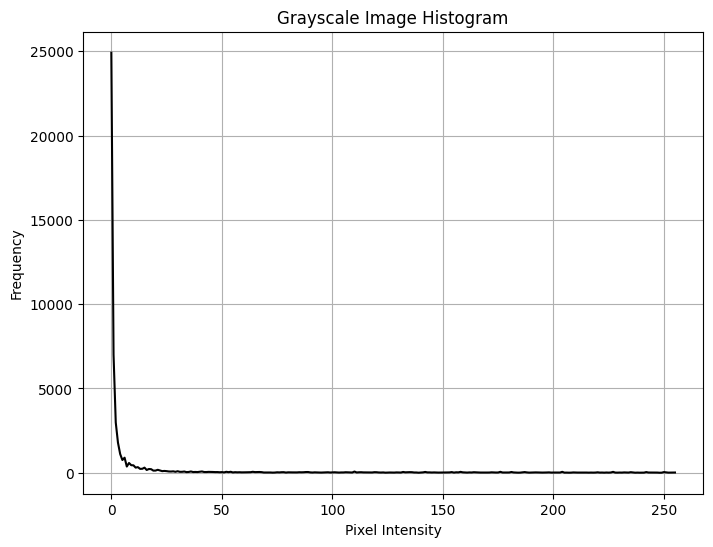

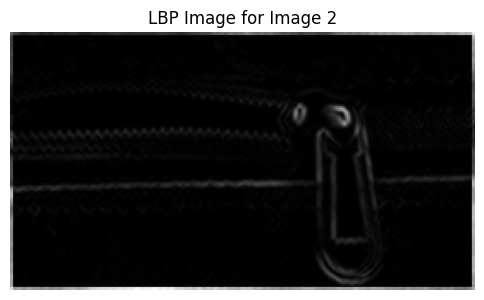

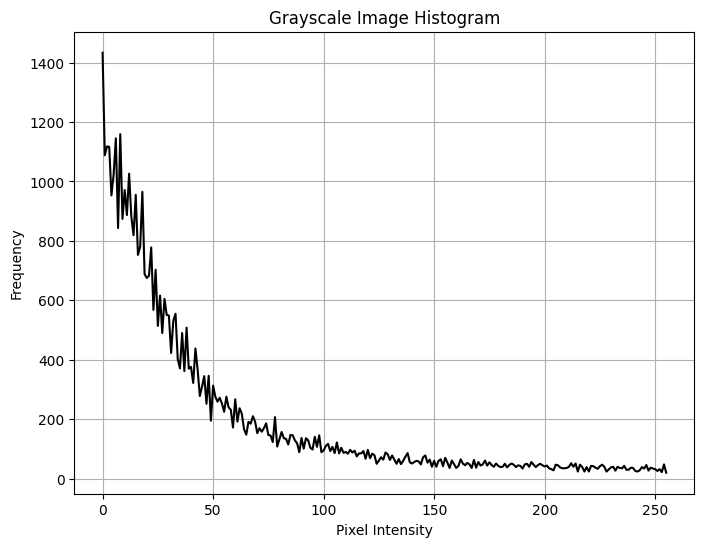

In [163]:
for i, image in enumerate([img5, img6_blur]):
    radius = 2      # Radius for LBP
    points = 4      # Number of circularly symmetric neighbors in LBP
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Compute LBP with 'var' method
    lbp = local_binary_pattern(gray, points, radius, method='var')
    
    # Handle NaN and infinite values in LBP
    lbp = np.nan_to_num(lbp, nan=0.0, posinf=0.0, neginf=0.0)

    
    # Display  LBP image
    plt.figure(figsize=(6, 6))
    plt.imshow(lbp, cmap='gray')
    plt.title(f"LBP Image for Image {i + 1}")
    plt.axis("off")
    plt.show()
    
    # Convert LBP to uint8
    lbp_uint8 = np.uint8(lbp)  
    
    # Compute histogram
    hist = cv2.calcHist([lbp_uint8], [0], None, [256], [0, 256])
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.plot(hist, color='black')
    plt.title("Grayscale Image Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()


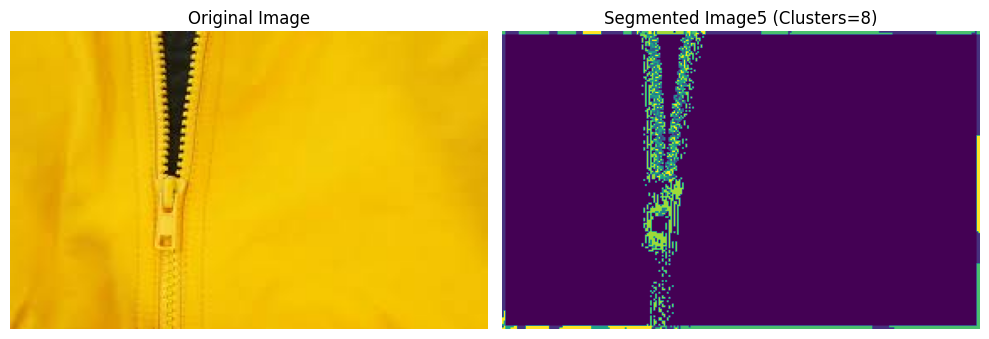

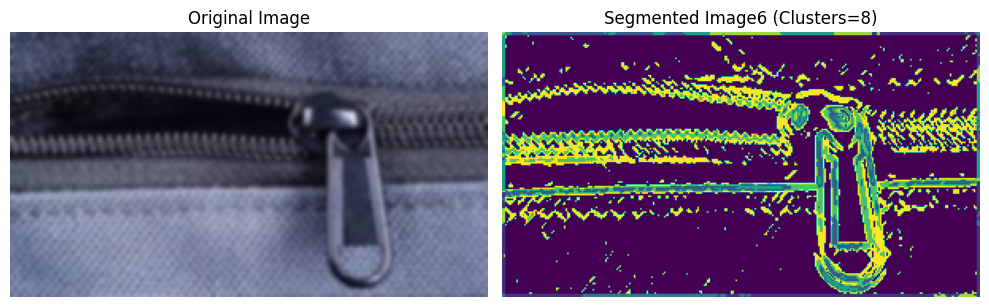

In [ ]:
# K-means with LBP for zipper segmentation
# increasing clusters increase amount of zipper but also noise 

for i, image in enumerate([img5, img6_blur]):
    clusters=  8  # number of K
    radius=  2 # Radius for LBP
    points = 4   # Number of circularly symmetric neighbors in LBP
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray, points, radius, method='var')
    lbp = np.nan_to_num(lbp, nan=0.0, posinf=0.0, neginf=0.0)
    lbp= cv2.normalize(lbp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    lbp_flat = lbp.reshape(-1, 1)
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(lbp_flat)
    segmented_image = kmeans.labels_.reshape(gray.shape)
     
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f"Segmented Image{i+5} (Clusters={clusters})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

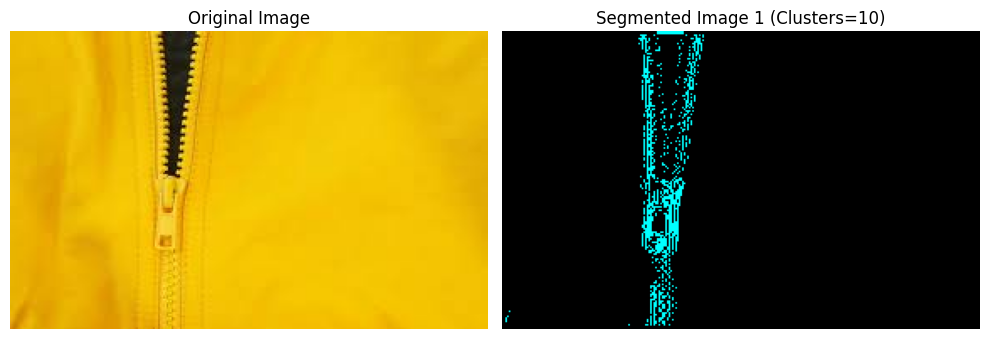

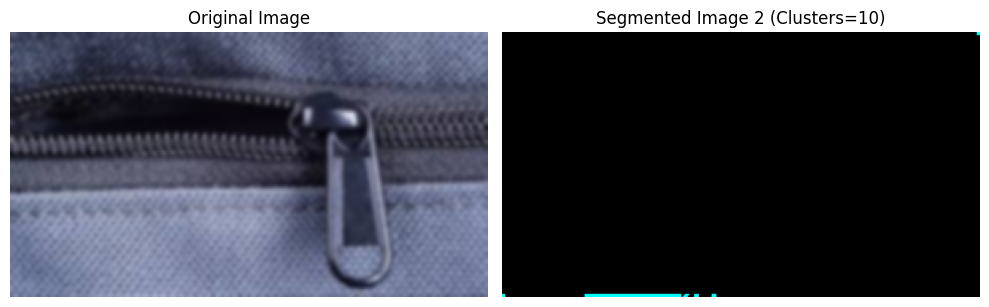

In [152]:
# Define distinct colors for clusters
distinct_colors = np.array([
    [0, 0, 0],       # Black
    [0, 0, 0],     # Green
    [0, 0, 0],     # Blue
    [0, 0, 0],   # Yellow
    [0, 0, 0],   # Orange
    [0, 0, 0],   # Magenta
    [0, 255, 255],   # Cyan
    [0, 0, 0], # Gray
    [0, 0, 0],   # Purple
    [0, 0, 0]  # White
], dtype=np.uint8)

# K-means with LBP for zipper segmentation
for i, image in enumerate([img5, img6_blur]):
    clusters = 10  # Number of clusters
    radius = 2     # Radius for LBP
    points = 4     # Number of circularly symmetric neighbors in LBP

    # Convert to grayscale and compute LBP
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray, points, radius, method='var')
    lbp = np.nan_to_num(lbp, nan=0.0, posinf=0.0, neginf=0.0)
    lbp = cv2.normalize(lbp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    lbp_flat = lbp.reshape(-1, 1)

    # K-means clustering
    kmeans = KMeans(n_clusters=clusters, random_state=0, n_init=10, max_iter=300)
    kmeans.fit(lbp_flat)

    # Assign colors to each cluster
    labels = kmeans.labels_
    segmented_pixels = distinct_colors[labels % len(distinct_colors)]  # Wrap around if clusters > colors
    segmented_image = segmented_pixels.reshape(*gray.shape, 3)  # Reshape to RGB format

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f"Segmented Image {i + 1} (Clusters={clusters})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


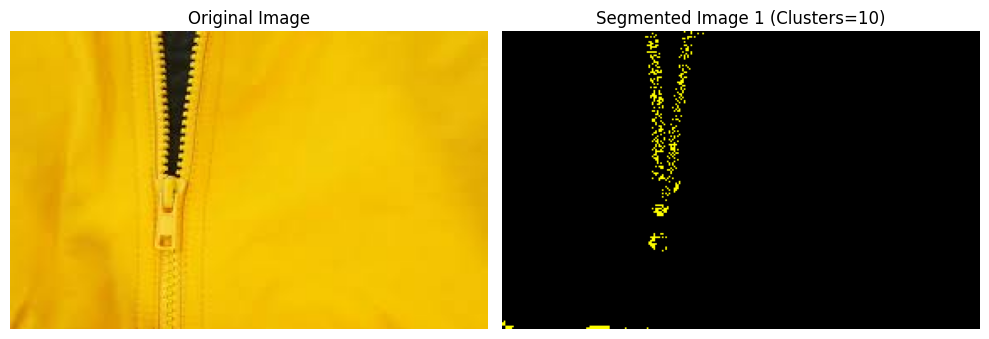

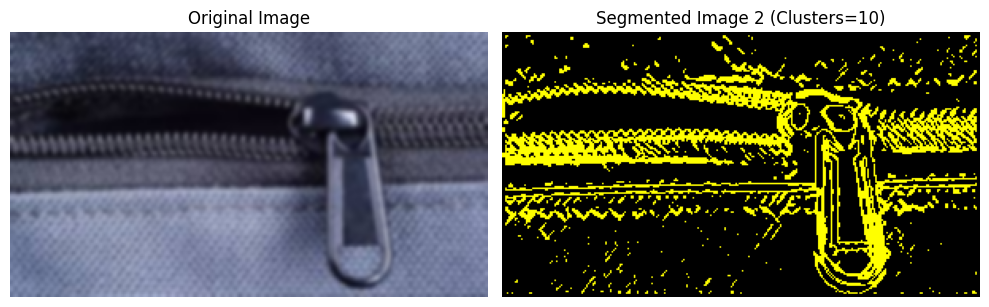

In [156]:
distinct_colors = np.array([
    [0, 0, 0],       # Black
    [0, 0, 0],     # Green
    [0, 0, 0],     # Blue
    [255, 255, 0],   # Yellow
    [0, 0, 0],   # Orange
    [0, 0, 0],   # Magenta
    [0, 0, 0],   # Cyan
    [255,255,0], # Gray
    [0, 0, 0],   # Purple
    [0, 0, 0]  # White
], dtype=np.uint8)
# K-means with LBP for zipper segmentation
for i, image in enumerate([img5, img6_blur]):
    clusters = 10  # Number of clusters
    radius = 2     # Radius for LBP
    points = 4     # Number of circularly symmetric neighbors in LBP

    # Convert to grayscale and compute LBP
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray, points, radius, method='var')
    lbp = np.nan_to_num(lbp, nan=0.0, posinf=0.0, neginf=0.0)
    lbp = cv2.normalize(lbp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    lbp_flat = lbp.reshape(-1, 1)

    # K-means clustering
    kmeans = KMeans(n_clusters=clusters, random_state=0, n_init=10, max_iter=300)
    kmeans.fit(lbp_flat)

    # Assign colors to each cluster
    labels = kmeans.labels_
    segmented_pixels = distinct_colors[labels % len(distinct_colors)]  # Wrap around if clusters > colors
    segmented_image = segmented_pixels.reshape(*gray.shape, 3)  # Reshape to RGB format

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f"Segmented Image {i + 1} (Clusters={clusters})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
distinct_colors = np.array([
    [0, 0, 0],       # Black
    [0, 255, 0],     # Green
    [0, 0, 255],     # Blue
    [255, 255, 0],   # Yellow
    [255, 100, 0],   # Orange
    [255, 0, 255],   # Magenta
    [0, 255, 255],   # Cyan
    [128, 128, 128], # Gray
    [128, 0, 128],   # Purple
    [255, 255, 255]  # White
], dtype=np.uint8)